## Deep learning frameworks

Deep learning frameworks rely on the concept of computational graphs 
TensorFlow ecosystem has 3 main components: 

 - TensorFlow API - written in C++, contains the API to define the models and train the models with data.  It also has a user-friendly Python interface.

 - TensorBoard - a visualization toolkit to help with analyzing, visualizing, and debugging TensorFlow graphs

 - TensorFlow Serving - a flexible, high-performance serving system used to deploy pre-trained machine learning models in production. Also written in C++ and accessible with a Python interface, Serving is able to switch from old to new models instantaneously

TensorFlow has been used widely in academic research and industrial applications. Some notable current uses include Deep Speech, RankBrain, SmartReply, and On-Device Computer Vision. You can check out some of the best official uses, research models, samples, and tutorials of TensorFlow  at this GitHub repo. https://github.com/tensorflow/models 

Compatible with TensorFlow 1.x, not TensorFlow 2.0

# A running example to train a 2-layer ReLU network on random data with L2 loss on TensorFlow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

Batch size = 32, Input Dimension = 500, Hidden Dimension = 50

Define computational graph
Create placeholders

In [2]:
x = tf.placeholder(tf.float32, shape=(32, 500))
y = tf.placeholder(tf.float32, shape=(32, 500))
w1 = tf.placeholder(tf.float32, shape=(500, 50))
w2 = tf.placeholder(tf.float32, shape=(50, 500))

### Forward pass

In [3]:
h = tf.maximum(tf.matmul(x, w1), 0)
y_pred = tf.matmul(h, w2)
diff = y_pred - y

Use predefined common losses

In [4]:
loss = tf.losses.mean_squared_error(y_pred, y)

Instructions for updating:
Use tf.cast instead.


Compute loss of gradient


In [5]:
grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])

In [6]:
learning_rate = 1e-5

Run the graph in a loop

Collect errors to evaluate performance

In [7]:
errorlist = [];

Run the graph multiple times

In [8]:
with tf.Session() as sess:
  # Create numpy arrays
    values = {x: np.random.randn(32, 500),
            w1: np.random.randn(500, 50),
            w2: np.random.randn(50, 500),
            y: np.random.randn(32, 500),}
    
    for t in range(50):
        out = sess.run([loss, grad_w1, grad_w2], feed_dict=values)
        loss_val, grad_w1_val, grad_w2_val = out
        values[w1] -= learning_rate * grad_w1_val
        values[w2] -= learning_rate * grad_w2_val
        print ('loss = %s' % loss_val)
        errorlist = np.append(errorlist,loss_val)

loss = 12599.705
loss = 12589.072
loss = 12578.452
loss = 12567.844
loss = 12557.253
loss = 12546.666
loss = 12536.097
loss = 12525.538
loss = 12514.991
loss = 12504.461
loss = 12493.94
loss = 12483.431
loss = 12472.934
loss = 12462.453
loss = 12451.979
loss = 12441.52
loss = 12431.072
loss = 12420.638
loss = 12410.216
loss = 12399.808
loss = 12389.41
loss = 12379.022
loss = 12368.649
loss = 12358.288
loss = 12347.938
loss = 12337.602
loss = 12327.277
loss = 12316.962
loss = 12306.663
loss = 12296.374
loss = 12286.096
loss = 12275.831
loss = 12265.578
loss = 12255.335
loss = 12245.108
loss = 12234.889
loss = 12224.686
loss = 12214.492
loss = 12204.31
loss = 12194.139
loss = 12183.982
loss = 12173.834
loss = 12163.704
loss = 12153.581
loss = 12143.47
loss = 12133.372
loss = 12123.286
loss = 12113.213
loss = 12103.148
loss = 12093.098


Plotting loss on the graph

2 main components of this code: defining computational graph and running this graph many times. While defining the graph, I create placeholders for input x, weights w1 and w2, and targets y. Then during the forward pass, I compute prediction for target y and the loss variable, which is the L2 distance between y and y_pred. Lastly, I tell TensorFlow to compute loss of gradient with respect to w1 and w2. After getting done building the graph, I enter a session to run the graph. Here I create numpy arrays that will fill in the placeholders above, feeding them for x, y, w1, w2. In order to train the network, I run the graph over and over, using gradient to update the weights and getting numpy arrays for loss, grad_w1, and grad_w2.

In [9]:
len(errorlist)

50

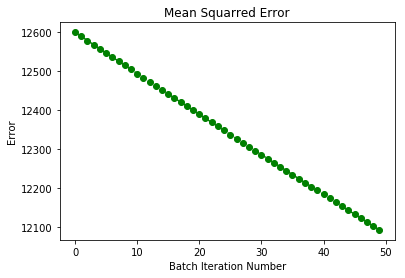

In [10]:
plt.figure(1)
plt.plot(errorlist,'--og');
plt.title("Mean Squarred Error")
plt.xlabel("Batch Iteration Number")
plt.ylabel("Error")
plt.show()